# 간단한 기계 학습의 예 : 선형회귀

In [6]:
%pip install tensorflow
%pip install keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 228.5 MB 133.4 MB/s eta 0:00:01   |█████▌                          | 39.4 MB 10.7 MB/s eta 0:00:18     |██████                          | 43.2 MB 10.7 MB/s eta 0:00:18
     |████████████████████████████████| 123 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 35.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 44.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 3.5 MB 40.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 40.3 MB/s eta 0:00:01
     |█████████████████████████████

# 1. 데이터 생성하기
numpy를 활용하여 간단하게 선형 회귀 데이터를 생성하고
x값에 따른 y값은 해당 x값에 난수로 할당해사, 회귀 계산에 적합한 분포의 데이터로 생성한다.

In [7]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

# 2. 데이터 조회하기

In [8]:
for x, y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, -1.5)
(1.1, 1.2)
(2.2, 4.8)
(3.3, 3.7)
(4.4, 3.5)
(5.6, 6.6)
(6.7, 5.0)
(7.8, 7.2)
(8.9, 10.1)
(10.0, 8.2)


# 3. 선형 회귀 모델 만들기

Keras의 Sequential을 사용하면, 단 몇줄로 선형 회귀 모델을 만들 수 있다.

In [9]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))

2022-08-08 22:09:51.821074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# 경사하강법 (gradient descent)로 선형회귀 함수를 구하고 learning rate은 0.01로 지정하였으며, 
# 비용 함수는 평균 제곱 오차 (mse: Mean Squared Error)를 사용했다.

In [10]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

/Users/KBS/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
# 선형 회귀 모델을 학습하기 전에, 먼저 최초로 설정된 w(기울기)를 조회해보자

In [13]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('initial w is : ' + str(w))

initial w is : 1.713688


# 4. 선형 회귀 모델 학습

총 10개의 데이터가 있으므로, batch_size를 10으로 설정하여 batch gradient descent를 실행.
epochs=10은 총 10번 반복 수행하여 모델을 학습한다는 뜻임

In [14]:
model.fit(X, Y, batch_size=10,epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 290ms/step - loss: 21.7626
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 3.5380
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 1.9380
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.7976
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 1.7852
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 1.7841
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 1.7840
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.7840
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7840
Epoch 10/10
1/1 [==============================] - 0s 20ms/step - loss: 1.7840


In [15]:
# 학습된 선형 회귀 모델의, w(기울기)를 보자

In [16]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 0.9601582


# 5. 선형회귀 시각화

시각화 결과 x값에 해당하는 선형 모델의 예측값이 우리가 랜덤으로 생성한 데이터 y와 상당히 비슷한 것을 알 수 있다.
이처럼 관찰된 데이터를 통해 얻어진 데이터 분포의 패턴을 파악하는 것을 선형 회귀라 하며,
이를 통해 관찰되지 않은 데이터에 대한 예측을 하는 것이 선형 회귀의 목적이라고 할 수 있다.
머신러닝의 기초라고 할 수 있으니 이해를 잘 해두는 것이 중요하다!!

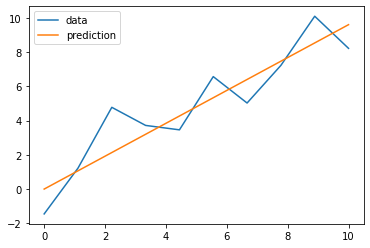

In [18]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()